<a href="https://colab.research.google.com/github/nazmul-kaonine/Data-Science-Projects/blob/master/Handwritten%20Digit%20Classification%20using%20Multiple%20Descriptors%20%26%20ANN/Raw_Input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Submitted by:
###Nazmul Kaonine
####PostGrad- UTS

# Initializing ALL libraries and loader functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature 
from sklearn import svm 
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import math, numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import os
import h5py
import glob
import cv2
from keras.preprocessing import image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')

0

In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
                                
                              


                        
        


    return images, labels

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


In [ ]:

X_train, y_train = load_mnist('/content/gdrive/My Drive/DLA2/', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/DLA2/', kind='t10k')



#Some Visualizations

In [ ]:
#Changing shape to 28x28 from 784
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[4])
print(X_train[4])



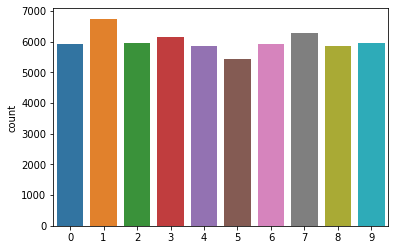

In [ ]:
sns.countplot(y_train)
plt.show()
#shows digit label counts


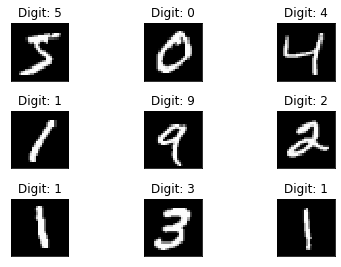

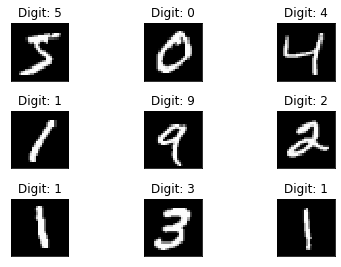

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
def display_image(position):
    image = X_train[position].squeeze()
    plt.title('Example %d. Label: %d' % (position, y_train[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

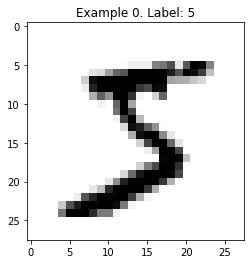

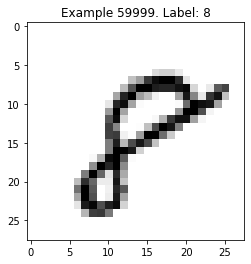

In [ ]:
display_image(0)
plt.show()
display_image(59999)
#to view specific images

### Sampling for faster loop testing to find optimal k

In [ ]:
X_train=X_train.reshape(-1,784)
X_test=X_test.reshape(-1,784)
print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 784)
Test dataset after reshaping :(10000, 784)


In [ ]:
Sample_train, Sample_test, Digit_train, Digit_test = train_test_split(
...     X_train, y_train, test_size=0.01, random_state=42)



####K NEAREST NEIGHBOR

In [ ]:
for k in range (1,5,2):
  clf=KNeighborsClassifier(n_neighbors=k)
  clf.fit(Sample_train,Digit_train)
  Digit_predicted=clf.predict(Sample_test)
  print('k= %d' %k)
  print("Test set Accuracy: {:.2f}".format(clf.score(Sample_test,Digit_test)))


k= 1
Test set Accuracy: 0.97
k= 3
Test set Accuracy: 0.97


In [ ]:
Digit_predicted=clf.predict(Sample_test)
print("Test set predictions: {}".format(clf.predict(Sample_test)))


In [ ]:
print(metrics.confusion_matrix(Digit_test, Digit_predicted))

Test set Accuracy: 0.98
[[6 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 1 0 0]
 [0 0 0 7 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 7 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 7 0 0]
 [0 0 0 0 0 0 0 0 9 0]
 [0 0 0 0 0 0 0 0 0 5]]


##Retesting the best K value on the whole set

In [ ]:
X_train=X_train.reshape(-1,784)
X_test=X_test.reshape(-1,784)

clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y_predicted=clf.predict(X_test)
y_test
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set Accuracy: {:.2f}".format(clf.score(X_test,y_test)))
print(metrics.confusion_matrix(y_test, y_predicted))

#SVM

In [ ]:
#SAMPLE test 0 
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#SAMPLE test 1 
clf = svm.SVC(kernel='rbf') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#SAMPLE Test 2
clf=svm.SVC(C=100,kernel='rbf',gamma=0.01)
clf.fit(X_train,y_train)
Digit_predicted=clf.predict(X_test)
print("Test set Accuracy: {:.2f}".format(clf.score(X_test,y_test)))


In [ ]:
#SAMPLE Test 3
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#Best Accuracy Achieved
clf=svm.SVC(C=100,kernel='poly',gamma=0.01, degree=4)
clf.fit(X_train,y_train)
Digit_predicted=clf.predict(X_test)
print("Test set Accuracy: {:.2f}".format(clf.score(X_test,y_test)))

 

Test set Accuracy: 0.98


In [ ]:
accuracy=metrics.accuracy_score(y_test, Digit_predicted)
print("Accuracy:",metrics.accuracy_score(y_test, Digit_predicted))

In [ ]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, Digit_predicted)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred,  average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro')) 


Precision Score :  0.9792006017788697
Recall: 0.9792


In [ ]:
#Printing some tested samples
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
print(orig_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
print(orig_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])
print(orig_labels[4])

#ANN 

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)
%load_ext tensorboard

Mnist=tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = Mnist.load_data()




2.2.0-rc3
2.3.0-tf
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
print(train_images.dtype)
print(train_images.shape)

uint8
(60000, 28, 28)


1


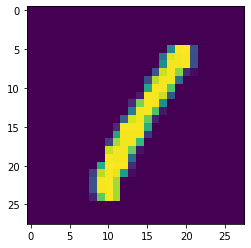

In [ ]:
#An image
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
import matplotlib.pyplot as plt
plt.imshow(train_images[3])
print(train_labels[3])

In [ ]:
#Normalizing
valid_images= train_images[:5000] / 255.0
valid_labels = train_labels[:5000]


train_images  = train_images[5000:] / 255.0
train_labels=train_labels[5000:]

test_images = test_images / 255.0

print(np.shape(train_images))
print(np.shape(valid_images))
print(np.shape(test_images))

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


In [ ]:
#Sample 1
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.Adamax(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model1.fit(train_images, train_labels, epochs=50,validation_data=(valid_images, valid_labels))


Epoch 1/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2131 - accuracy: 0.9362 - val_loss: 0.1118 - val_accuracy: 0.9670
Epoch 2/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0986 - accuracy: 0.9700 - val_loss: 0.0858 - val_accuracy: 0.9760
Epoch 3/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0688 - accuracy: 0.9788 - val_loss: 0.0751 - val_accuracy: 0.9774
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0501 - accuracy: 0.9848 - val_loss: 0.0703 - val_accuracy: 0.9802
Epoch 5/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0684 - val_accuracy: 0.9790
Epoch 6/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0668 - val_accuracy: 0.9820
Epoch 7/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0232 - accuracy: 0.9930 - val_loss: 0.0728 - val_accuracy:

In [ ]:
#Best Accuracy Achieved
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(train_images, train_labels, epochs=50,validation_data=(valid_images, valid_labels))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


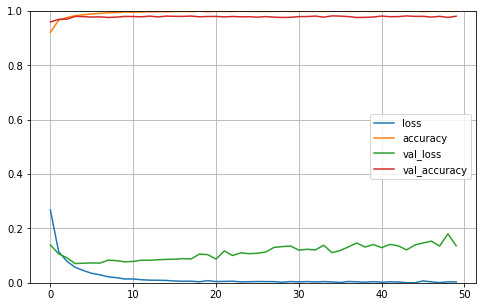

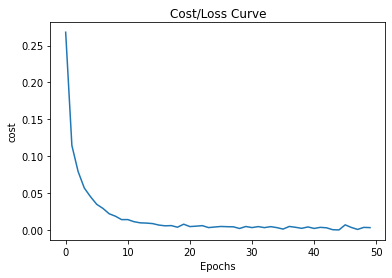

In [ ]:
#Cost/Loss
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [ ]:
model.evaluate(test_images, test_labels)

In [ ]:
model1.evaluate(test_images, test_labels)